In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install keras-rmsprop

E: Package 'libfluidsynth1' has no installation candidate
ERROR: Could not find a version that satisfies the requirement keras-rmsprop (from versions: none)
ERROR: No matching distribution found for keras-rmsprop


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# we need to fit model with sequence of tokens with specific length
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
# normal LSTM/GRU and the Version with Cuda
from keras.layers import Dense, Embedding, GRU, LSTM, Dropout, Bidirectional
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import Adam

# keras wrapper for k-fold cross-validation
!pip install keras-scikit-learn
#from keras.wrappers.scikit_learn import KerasClassifier
# normsl cross validation
from sklearn.model_selection import cross_val_score, train_test_split
# cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import os


# Any results you write to the current directory are saved as output.

ERROR: Could not find a version that satisfies the requirement keras-scikit-learn (from versions: none)
ERROR: No matching distribution found for keras-scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from nltk import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, classification_report

from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
datal = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/camerounaise_spam_data.xlsx'))
#datal = datal = pd.read_csv('/content/drive/MyDrive/smsspamcollection/spam.csv',encoding='latin-1')

scale_mapped={
    'Spam':1.0,
    'spam':1.0,
    'ham':0.0,
    'h':0.0
}

datal.rename(columns = {'v1':'label','v2':'SMS'},inplace=True)
# Checking the rows and columns(m*n)
data = (datal[['label','SMS']].dropna().reset_index(drop=True)).sample(frac = 1)
data_label= data['label'].replace(scale_mapped)
print(len(data))
# Checking for the nulls
data.info()
# Re-Checking for nulls
data.isnull().sum()
# Row-wise all values are displayed
data.values


20642
<class 'pandas.core.frame.DataFrame'>
Index: 20642 entries, 16455 to 17904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   20642 non-null  object
 1   SMS     20642 non-null  object
dtypes: object(2)
memory usage: 483.8+ KB


array([['ham', 'bby the net work'],
       ['ham', 'Salle S008A pour ceux qui veulent travailler.\n'],
       ['ham', "William don't make me to be angry"],
       ...,
       ['ham', 'On dirait bien'],
       ['ham', "Ton ib n'accuse pas réception\n"],
       ['ham',
        '1- 1) Décrire clairement le problème que votre maman vous pose ici et dire ce qu’elle attend de vous ?']],
      dtype=object)

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


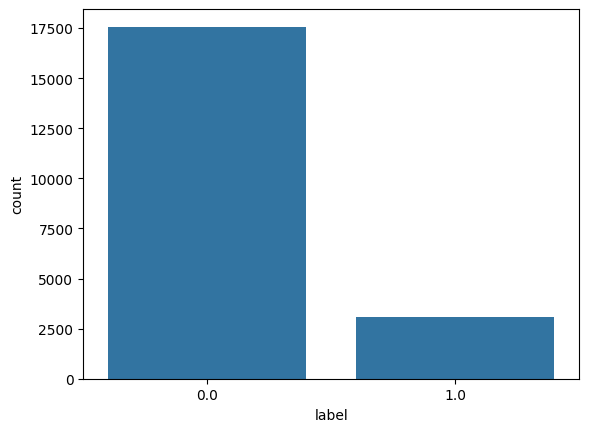

In [ ]:

sns.countplot(x=data_label)
plt.show()


In [ ]:
#l_2024_Y_2023
spam = 0
ham = 0
taille=20616
for e in data_label:
  if e == 1.0:
    spam +=1
  else:
    ham +=1
print(ham + spam)
print(spam/taille)
print(ham/taille)
print(spam)
print(ham)

20642
0.14925300737291425
0.8520081490104773
3077
17565


In [ ]:
# Libraries needed for NLP
import nltk
import re

# Stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Stemmers
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246764 sha256=301454723921d58843e787d30e4438ac2d97e74f9e803b6d7ab30029cbe32109
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext

PRETRAINED_MODEL_PATH = '/content/drive/MyDrive/fastext/lid.176.bin'
model_fastext = fasttext.load_model(PRETRAINED_MODEL_PATH)


In [ ]:
data_sms = []
text = []
# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# Cleanup
# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def clean_data_en(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
  # replace email address with 'emailaddress'
  text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", r'emailadress ', str(text))
  # replace urls with 'webaddress'
  #text = re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,6}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", r'webaddress', str(text))
  text = re.sub(r"(https?|ftp)://[^\s/$.?#].[^\s]*", r'webaddress', str(text))
  text = re.sub( r'\b(?:https?:\/\/)?(?:\*?\w+\*?\s*)?(bit\.ly|eianal\.com|onelink\.to|viaonelink\.to|cutt\.ly)\/[^\s]*\b', r'webaddress', str(text))
  # replace 10 digit phone number with 'phone-number'
  #text =  re.sub('(?:\d{8}(?:\d{2}(?:\d{2})?)?|\(\+?\d{2,3}\)\s?(?:\d{4}[\s*.-]?\d{4}|\d{3}[\s*.-]?\d{3}|\d{2}([\s*.-]?)\d{2}\1\d{2}(?:\1\d{2})?))', r'phone-number', text)
  text =  re.sub( r'(?:\+?237|00237|237)?[ -*./]*(6[235-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}|[1-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2})', r'phoneNumber', text)
  text = re.sub(r'\b\d[\d\s,\.]*\s*(FCFA|F|fr|fcf|f|fcfa|xfa|XFA|u|U)\b', r' money ', text)
  #text = re.sub('[\d]{1,10}fcfa|[\d]{1,10}FCFA|[\d]{1,10}Fr|[\d]{1,10}fr|[\d]{1,10}FCFA|[\d]{1,10} fcfa|[\d]{1,10} FCFA|[\d]{1,10} Fr|[\d]{1,10} fr', r' money ', text)
  # remove punctuation
  text=re.sub('[^\w\d\s]', r' ',text)
  # remove whitespace between terms with single space
  text = re.sub('\s+', r' ', text)
  # remove leading and trailing whitespace
  text = re.sub('^\s+|\s*?$', r' ',text)
  # change words to lower case
  text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' url ', text)
  text = re.sub(r'(?:\+?237|00237|237)? *(6[235-9] *[0-9]{7}|[1-9] *[0-9]{7})', r' phoneNumber ', text)
  text = re.sub('[\d]{1,10}GO|[\d]{1,10}Go|[\d]{1,10}gO|[\d]{1,10}go|[\d]{1,10} GO|[\d]{1,10} Go|[\d]{1,10} gO|[\d]{1,10} go', r' dataConnexion ', text)
  text = re.sub('([http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)| (https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r'webaddress', text)
  # replace normal number with 'number'
  text = re.sub('\d+(\.\d+)?', r'Nombre ', text)
  text = text.lower()
  return text

def clean_data_fr(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
      and remove words containing numbers.'''
    # replace email address with 'emailaddress'
    text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", r'adresseemail ', str(text))
    # replace urls with 'webaddress'
    text = re.sub( r"(https?|ftp)://[^\s/$.?#].[^\s]*", r'adresseweb ', str(text))
    text = re.sub( r'\b(?:https?:\/\/)?(?:\*?\w+\*?\s*)?(bit\.ly|eianal\.com|onelink\.to|viaonelink\.to|cutt\.ly)\/[^\s]*\b', r'adresseweb ', str(text))
    # replace 10 digit phone number with 'phone-number'
    text =  re.sub(r'(?:\+?237|00237|237)?[ -*./]*(6[235-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}|[1-9][ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2}[ -*./]*[0-9]{2})', r'phoneNumber ', text)
    text = re.sub(r'\b\d[\d\s,\.]*\s*(FCFA|F|fr|fcf|f|fcfa|xfa|XFA|u|U)\b', r' argent ', text)
    #text = re.sub('[\d]{1,10}fcfa|[\d]{1,10}FCFA|[\d]{1,10}Fr|[\d]{1,10}fr|[\d]{1,10}FCFA|[\d]{1,10} fcfa|[\d]{1,10} FCFA|[\d]{1,10} Fr|[\d]{1,10} fr', r' argent ', text)
    # remove punctuation
    text=re.sub('[^\w\d\s]', r' ',text)
    # remove whitespace between terms with single space
    text = re.sub('\s+', r' ', text)
    # remove leading and trailing whitespace
    text = re.sub('^\s+|\s*?$', r' ',text)
    # change words to lower case
    text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' url ', text)
    text = re.sub('(00237[1-9] *[0-9]{8}|\+237[1-9] *[0-9]{8}|(237[1-9] *[0-9]{8})|(6[2|3|5-9] *[0-9]{7}))', r' numeroTelephone ', text)
    text = re.sub('[\d]{1,10}GO|[\d]{1,10}Go|[\d]{1,10}gO|[\d]{1,10}go|[\d]{1,10} GO|[\d]{1,10} Go|[\d]{1,10} gO|[\d]{1,10} go', r' donneeInternet ', text)
    text = re.sub('([http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)| (https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' adresseWeb ', text)
    # replace normal number with 'number'
    text = re.sub('\d+(\.\d+)?', r'Nombre ', text)
    text = text.lower()
    return text


In [ ]:
    from nltk.corpus import stopwords

    more_stopwords = ['u', 'im', 'c']
    englishStopWord = stopwords.words("english")
    frenchStopWord = stopwords.words("french")
    englishStopWord = stopwords.words("english") + more_stopwords
    french_english =  englishStopWord +frenchStopWord
    def testFuncOld(text):
        text = ' '.join([word for word in text.split() if word not in englishStopWord])
        return text

    def testFrenchEnglish(text):
        text = ' '.join([word for word in text.split() if word not in french_english])
        return text

    def testFuncNew(text):
        text = ' '.join([word for word in text.split() if word not in text])
        return text

        #remove french stop wo13/02/2023, 09:54 - +237 99824722: rd
    def testFuncOldFrench(text):
        text = ' '.join([word for word in text.split() if word not in stopwords.words("french")])
        return text

    def testFuncNewFrench(text):
        text = ' '.join([word for word in text.split() if word not in text])
        return text

    def eliminer(text):
      text = str(text).replace('\n', ' ')
      predictions = model_fastext.predict(text)
      if predictions[0][0] == '__label__fr':
        text = clean_data_fr(text)
        text = testFuncOldFrench(text)
      elif predictions[0][0] == '__label__en':
        text = clean_data_en(text)
        text = testFuncOld(text)
      else:
        clean_data_en(text)
        text = clean_data_fr(text)
        text = testFrenchEnglish(text)
      return text


In [ ]:
data['SMS']= data['SMS'].apply(eliminer)

In [ ]:
y = data_label

print(max(len(s) for s in data['SMS']))
print(min(len(s)for s in data['SMS']))
sorted_X = sorted(len(s) for s in data['SMS'])
print(sorted_X[len(sorted_X) // 2])


1124
0
37


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['SMS'])
sequences = tokenizer.texts_to_sequences(data['SMS'])

vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

15765


In [ ]:
# divide sum of length of all sequences by number of all sequences to find averge length of each sequence
sum([len(x) for x in sequences]) // len(sequences)

9

In [ ]:
pad = 'post'
max_len = 87
embedding_size = 100
batch_size = 20
sequences = pad_sequences(sequences, maxlen=max_len, padding=pad, truncating=pad)
sequences.shape



(20642, 87)

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import *
import numpy as np
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
batch_size = 2
loss_function = sparse_categorical_crossentropy

no_epochs = 2
optimizer = Adam()
verbosity = 1
num_folds = 3
y = data_label[:20620]
x =  sequences[:20620]
# Load CIFAR-10 data
x=np.array(x)
y=np.array(y)


# Normalize data
input_train = sequences[:20620] / 250
input_test = sequences[:20620]/ 250

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model

# K-fold Cross Validation model evaluation
fold_no = 5
for train, test in kfold.split(x, y):
  # Define the model architecture
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
  model.add(Dropout(0.8))
  model.add(LSTM(140, return_sequences=False))
  model.add(Dropout(0.8))
  model.add(Dense(1, activation='sigmoid', name='Classification'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(x[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_split=0.2, verbose=1)

# Generate generalization metrics
  scores = model.evaluate(x[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

#== Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/2
5498/5498 [==============================] - 421s 76ms/step - loss: 0.4211 - accuracy: 0.8493 - val_loss: 0.4462 - val_accuracy: 0.8364
Epoch 2/2
5498/5498 [==============================] - 415s 76ms/step - loss: 0.3750 - accuracy: 0.8421 - val_loss: 0.3251 - val_accuracy: 0.8364
Score for fold 5: loss of 0.2855663299560547; accuracy of 85.26331186294556%
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/2
5499/5499 [==============================] - 470s 85ms/step - loss: 0.3804 - accuracy: 0.8841 - val_loss: 0.3363 - val_accuracy: 0.8953
Epoch 2/2
5499/5499 [==============================] - 487s 89ms/step - loss: 0.3582 - accuracy: 0.8925 - val_loss: 0.3682 - val_accuracy: 0.8785
Score for fold 6: loss of 0.3674517571926117; accuracy of 87.88011074066162%
--------------------------------------------------------------------

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(x[test])
y_test = np.array(y[test])
eval_ = model.evaluate(x[test], y[test])
print(eval_[0], eval_[1]) # loss / accuracy

215/215 [==============================] - 12s 54ms/step - loss: 0.4186 - accuracy: 0.8544
0.41856443881988525 0.8543576598167419


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model.predict(x[test]) > 0.5).astype("int32")

215/215 [==============================] - 12s 54ms/step


In [ ]:
c_report(y[test], preds)

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      5872
         1.0       0.00      0.00      0.00      1001

    accuracy                           0.85      6873
   macro avg       0.43      0.50      0.46      6873
weighted avg       0.73      0.85      0.79      6873

Accuracy : {:.7f}0.8543576313109268


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8543576313109268

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=09fa30730ae55c73d47b598952103ee8c03319e67861f736cf39110056fa957b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


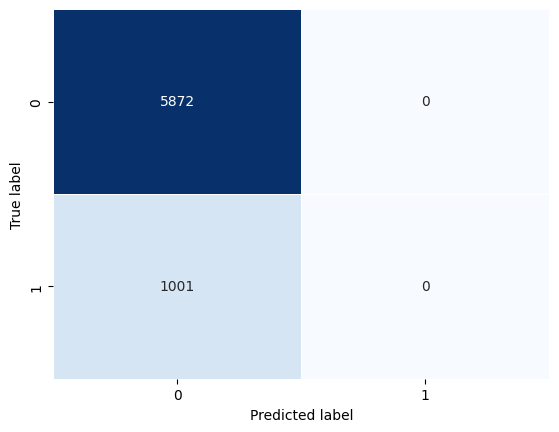

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y[test], preds)

In [ ]:
texte1 = "please where are you going to http://www.facebook.org ?"
texte = [["Yes! 20 000U njoh pour tes appels. Souscris à Orange Bonus au #111*0# : 3000U = 21000U d'appels tous réseaux /30jrs. En plus, tu peux gagner un super lot."],["Bravo! Orange Bonus 07 jours vers Orange jusqu'au 09/04/2024 21:01. Solde au #123#. Renouvelez votre forfait Orange Bonus avant expiration sur Max it et recevez le triple."],["Le moins cher ton combat! Orange Money t'offre 25% d'économie sur tes frais de retrait quel que soit ton réseau! #150# ou via Max it."],["L'abonné 237697814238 que vous avez essayé de joindre est maintenant disponible. Boostez vos activités agricoles avec MyFarm au #111*531#. 1 semaine offerte"]]


def spliter(text):
  return str(text).split()

# Flatten the texte list into a single list


# Pre-process the texte variable
texte = [clean_data_fr(e) for e in texte]
texte = [eliminer(e) for e in texte]
texte = [spliter(e) for e in texte]
tokenizer.fit_on_texts(texte)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texte)
sequences = tokenizer.texts_to_sequences(texte)

vocab_size = len(tokenizer.word_index)+1


pad = 'post'
max_len = 37
embedding_size = 100
batch_size = 20
sequences = pad_sequences(sequences, maxlen=max_len, padding=pad, truncating=pad)
preds = (model.predict(sequences) > 0.5).astype("int32")
for e in preds:
  if e == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")

1/1 [==============================] - 0s 433ms/step
ceci est un Ham
ceci est un Ham
ceci est un Ham
ceci est un Ham


In [ ]:
texte2 =[["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange offre des données gratuites à tous *ANCIENNE CARTE SIM* Sim de 6 mois - *10GB* 1 an et plus - *20 GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est éligible à cette offre _POUR SIM 6 MOIS_👇 _1 AN ET PLUS SIM_👇 http://rbdp.shop/TpwBqne/28633256331693815355ef3b4d"],["* Pour célébrer le 15e anniversaire de l'entreprise, afin de redonner aux utilisateurs, 45 Go de trafic Internet mobile ont été attribués en récompense.* * J'ai reçu le mien.*  * OUVREZ CECI↓* https://1rmzcx.top/?k=15"],["*OFFRE DE DONNÉES GRATUITES ORANGE ANCIENNE CARTE SIM* Orange est toujours allumé *ANCIENNE CARTE SIM* Promo Sim de 6 mois - *10GB* 1 an et plus - *20GB* Dépêchez-vous maintenant et vérifiez si votre *CARTE SIM ORANGE* est admissible à cette offre http://nowreap.shop/NjwN7qe/79515922029153738339499fbd"]]


def spliter(text):
  return str(text).split()









# Flatten the texte list into a single list


# Pre-process the texte variable
texte = [clean_data_fr(e) for e in texte2]
texte = [eliminer(e) for e in texte]
texte = [spliter(e) for e in texte]
tokenizer.fit_on_texts(texte)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texte)
sequences = tokenizer.texts_to_sequences(texte)

vocab_size = len(tokenizer.word_index)+1


pad = 'post'
max_len = 37
embedding_size = 100
batch_size = 20
sequences = pad_sequences(sequences, maxlen=max_len, padding=pad, truncating=pad)
preds = (model.predict(sequences) > 0.5).astype("int32")
for e in preds:
  if e == 1:
    print("ceci est un Spam")
  else:
    print("ceci est un Ham")

1/1 [==============================] - 0s 23ms/step
ceci est un Ham
ceci est un Ham
ceci est un Ham


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs() # JavaScript plots

#create explainer
explainer= shap.KernelExplainer(model.predict, x[train][:10])

1/1 [==============================] - 0s 89ms/step


In [ ]:
shap_values = explainer.shap_values(x[test][:1])

  0%|          | 0/1 [00:00<?, ?it/s]

681/681 [==============================] - 68s 99ms/step


In [ ]:
#save shap values
from numpy import savetxt
# Reshape shap_values into a 2-dimensional array
shap_values = shap_values.reshape((shap_values.shape[0], shap_values.shape[1]))
# Save the reshaped shap_values to a CSV file
savetxt('shap_values_obs'+ str(index)+'.csv', shap_values, delimiter=';')

NameError: name 'index' is not defined

In [ ]:
explanation = shap.Explanation(shap_values, data=observation, base_values=explainer.expected_value)#mean(y_train_pred)

NameError: name 'observation' is not defined

In [ ]:
shap.force_plot(explanation,matplotlib=True,show=True)

#save image
# pl.savefig("force_plot_"+str(index)+".png")

NameError: name 'explanation' is not defined

In [ ]:
# init the JS visualization code
shap.initjs()

# transform the indexes to words
import numpy as np

words = x.get_word_index()
num2word = {}
for w in words.keys():
    num2word[words[w]] = w
x_test_words = np.stack(
    [
        np.array(list(map(lambda x: num2word.get(x, "NONE"), x[test][i])))
        for i in range(1)
    ]
)

AttributeError: 'numpy.ndarray' object has no attribute 'get_word_index'

In [ ]:
# Compute the estimated Shapley values
index = 0 #choosen instance
observation = sequences[4:]
shap_values = explainer.shap_values(observation)
print("Shape of explanation : ",shap_values.shape)
shap_values

0it [00:00, ?it/s]

IndexError: list index out of range

In [ ]:
# Reshape shap_values into a 2-dimensional array
shap_values = shap_values.reshape((shap_values.shape[0], shap_values.shape[1]))
# Save the reshaped shap_values to a CSV file
savetxt('shap_values_obs'+ str(index)+'.csv', shap_values, delimiter=';')

NameError: name 'savetxt' is not defined

In [ ]:
explanation = shap.Explanation(shap_values, data=observation, base_values=explainer.expected_value)#mean(y_train_pred)

In [ ]:
shap.force_plot(explanation[:1],matplotlib=True,show=True)

#save image
# pl.savefig("force_plot_"+str(index)+".png")

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values, sequences.columns, show=False)
#save image
pl.savefig("decision_plot_"+str(index)+".png")

AttributeError: 'list' object has no attribute 'columns'

In [ ]:

def compute_contrib_pooling_layer(model, data):
  #next(x for x in model.layers[::-1] if isinstance(x, layers.Conv2D))
  i = -3
  n_chanels = len([layer for layer in model.layers if isinstance(layer, layers.InputLayer)])
  if isinstance(model.layers[i+1], layers.Dense) :
    current_layer_contribs = None
    next_layer_contribs = compute_contrib_penultimate_layer(model, data)
    while isinstance(model.layers[i+1], layers.Dense) :
      x = model.layers[i]
      next_layer = model.layers[i+1]
      weights = next_layer.get_weights()[0]
      intermediate_model = Model(inputs=model.input, outputs=x.output)
      intermediate_out = intermediate_model.predict([data])
      j = 0
      print(x.name, next_layer.name)
      current_layer_contribs = numpy.empty((intermediate_out.shape[0], weights.shape[0], next_layer_contribs.shape[2]), dtype=numpy.float32)
      for (out, c) in zip(intermediate_out, next_layer_contribs):
        out_1 = out.reshape((out.shape[0], 1))
        contrib_mat = out_1 * weights
        # standard LRP -- uncomment the line below
        z = numpy.sum(contrib_mat, axis=0)
        contrib_mat = contrib_mat / z
        contrib = contrib_mat.dot(c)
        current_layer_contribs[j] = contrib
        j += 1
      i-=1
      next_layer_contribs = current_layer_contribs
    return current_layer_contribs
  else :
    return compute_contrib_penultimate_layer(model,data)

a = compute_contrib_pooling_layer(model,sequences[0])


NameError: name 'compute_contrib_penultimate_layer' is not defined

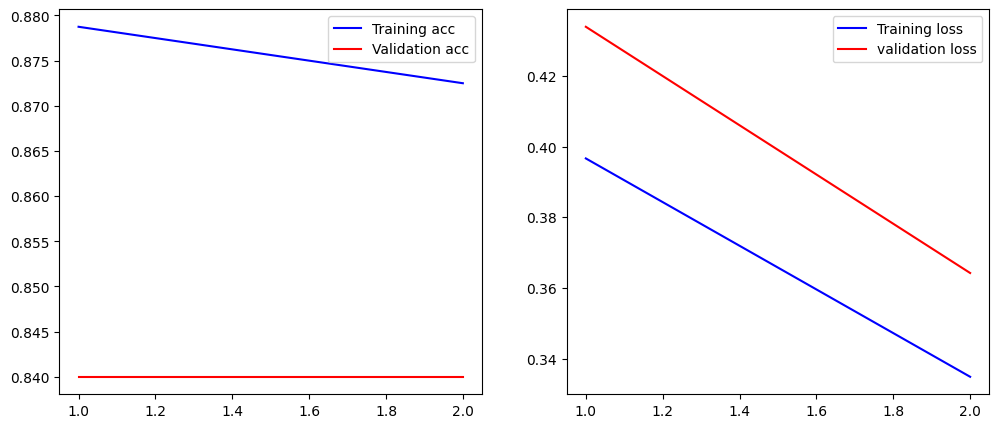

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import History

def plot_model(result):
    acc = result.history['accuracy']
    val_acc = result.history['val_accuracy']
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    x = range(1, len(acc)+1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label= 'Validation acc')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='validation loss')
    plt.legend()

plot_model(history)

K-fold cross with GRU

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import *
import numpy as np
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
batch_size = 2
loss_function = sparse_categorical_crossentropy

no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5
y = data_label[:15000]
x =  sequences[:15000]
# Load CIFAR-10 data
x=np.array(x)
y=np.array(y)


# Normalize data
input_train = sequences[:15000] / 250
input_test = sequences[:15000]/ 250

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model

# K-fold Cross Validation model evaluation
fold_no = 5
for train, test in kfold.split(x, y):
  # Define the model architecture
  model1 = Sequential()
  model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
  model1.add(Dropout(0.8))
  model1.add(GRU(140, return_sequences=False))
  model1.add(Dropout(0.86))
  model1.add(Dense(1, activation='sigmoid', name='Classification'))
  model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # Fit data to model
  results1 = model1.fit(x[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_split=0.2, verbose=1)
# Generate generalization metrics
  scores = model1.evaluate(x[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

#== Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/5
4800/4800 [==============================] - 115s 24ms/step - loss: 0.1347 - accuracy: 0.9643 - val_loss: 0.0622 - val_accuracy: 0.9887
Epoch 2/5
4800/4800 [==============================] - 115s 24ms/step - loss: 0.0456 - accuracy: 0.9883 - val_loss: 0.0346 - val_accuracy: 0.9917
Epoch 3/5
4800/4800 [==============================] - 115s 24ms/step - loss: 0.0370 - accuracy: 0.9916 - val_loss: 0.0305 - val_accuracy: 0.9917
Epoch 4/5
4800/4800 [==============================] - 115s 24ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0394 - val_accuracy: 0.9912
Epoch 5/5
4800/4800 [==============================] - 115s 24ms/step - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.0426 - val_accuracy: 0.9929
Score for fold 5: loss of 0.03422150760889053; accuracy of 99.33333396911621%
Epoch 1/5
4800/4800 [==============================] - 115s 24ms/step - loss: 0.1307 - accuracy: 0.9594 - val_loss: 0.0486 - val_accuracy: 0.9879
Epoch 2/5
4800/4800 [=========================

In [ ]:
model1.summary()
print(results1)
loss, accuracy = model1.evaluate(x[train] , y[train] , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model1.evaluate(x[test], y[test], verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 37, 100)           1620500   
                                                                 
 dropout_38 (Dropout)        (None, 37, 100)           0         
                                                                 
 gru_9 (GRU)                 (None, 140)               101640    
                                                                 
 dropout_39 (Dropout)        (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1722281 (6.57 MB)
Trainable params: 1722281 (6.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accura

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(x[test])
y_test = np.array(y[test])
eval_ = model1.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

94/94 [==============================] - 1s 12ms/step - loss: 0.0345 - accuracy: 0.9913
0.03451026603579521 0.9913333058357239


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model1.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 1s 12ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2545
         1.0       0.97      0.97      0.97       455

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Accuracy : {:.7f}0.9913333333333333


0.9913333333333333

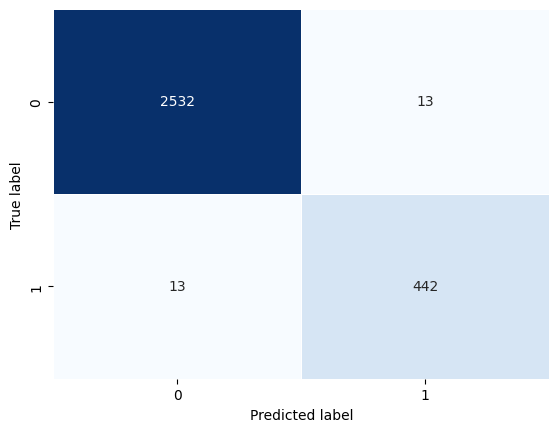

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)

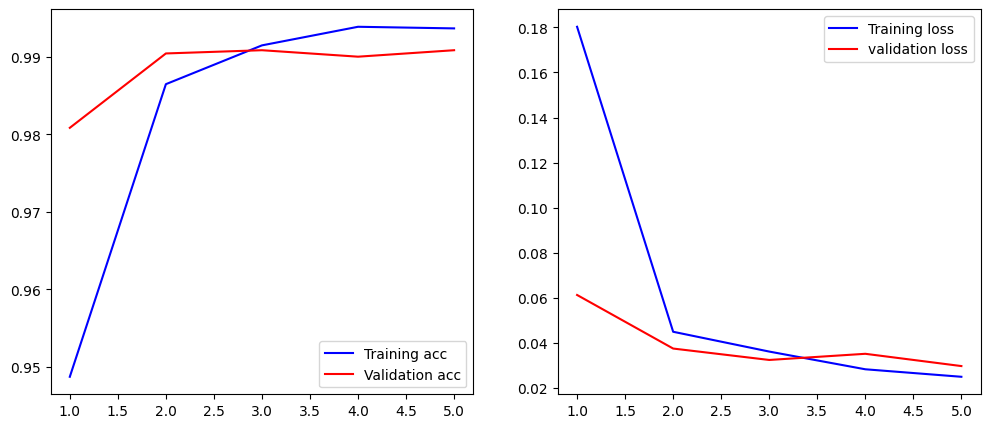

In [ ]:
plot_model(results1)

Entrainement du modele BiLSTM

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import *
import numpy as np
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
batch_size = 2
loss_function = sparse_categorical_crossentropy

no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 5
y = data_label[:15000]
x =  sequences[:15000]
# Load CIFAR-10 data
x=np.array(x)
y=np.array(y)


# Normalize data
input_train = sequences[:15000] / 250
input_test = sequences[:15000]/ 250

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model

# K-fold Cross Validation model evaluation
fold_no = 5
for train, test in kfold.split(x, y):
  # Define the model architecture
  model2 = Sequential()
  model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
  model2.add(Dropout(0.8))
  model2.add(Bidirectional(LSTM(140, return_sequences=False)))
  model2.add(Dropout(0.8))
  model2.add(Dense(1, activation='sigmoid', name='Classification'))
  model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # Fit data to model
  results2 = model2.fit(x[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_split=0.2, verbose=1)
# Generate generalization metrics
  scores = model2.evaluate(x[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

#== Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/5
4800/4800 [==============================] - 184s 38ms/step - loss: 0.1568 - accuracy: 0.9533 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 2/5
4800/4800 [==============================] - 176s 37ms/step - loss: 0.0519 - accuracy: 0.9868 - val_loss: 0.0488 - val_accuracy: 0.9896
Epoch 3/5
4800/4800 [==============================] - 175s 36ms/step - loss: 0.0381 - accuracy: 0.9904 - val_loss: 0.0373 - val_accuracy: 0.9896
Epoch 4/5
4800/4800 [==============================] - 179s 37ms/step - loss: 0.0306 - accuracy: 0.9922 - val_loss: 0.0341 - val_accuracy: 0.9887
Epoch 5/5
4800/4800 [==============================] - 174s 36ms/step - loss: 0.0247 - accuracy: 0.9947 - val_loss: 0.0368 - val_accuracy: 0.9908
Score for fold 5: loss of 0.03535957634449005; accuracy of 99.23333525657654%
Epoch 1/5
4800/4800 [==============================] - 176s 36ms/step - loss: 0.1221 - accuracy: 0.9648 - val_loss: 0.0408 - val_accuracy: 0.9896
Epoch 2/5
4800/4800 [=========================

94/94 [==============================] - 2s 23ms/step - loss: 0.0355 - accuracy: 0.9890
0.035471126437187195 0.9890000224113464
94/94 [==============================] - 3s 23ms/step
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2532
         1.0       0.97      0.96      0.96       468

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Accuracy : {:.7f}0.989


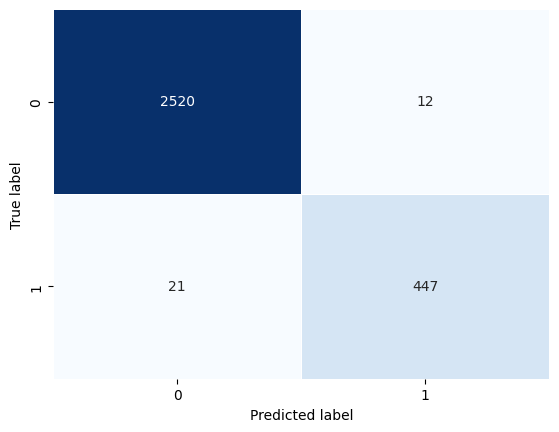

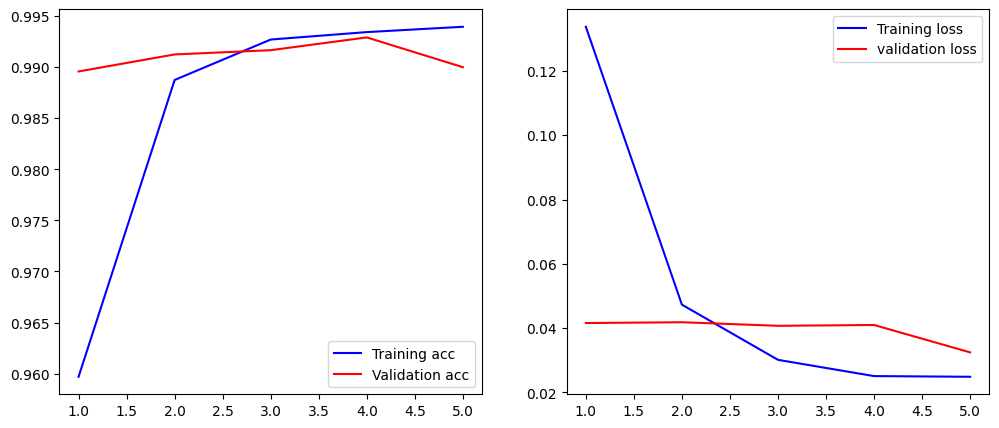

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(x[test])
y_test = np.array(y[test])
eval_ = model2.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')


preds = (model2.predict(x[test]) > 0.5).astype("int32")
c_report(y[test], preds)


import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y[test], preds)

import matplotlib.pyplot as plt
from keras.callbacks import History

def plot_model(result):
    acc = results2.history['accuracy']
    val_acc = results2.history['val_accuracy']
    loss = results2.history['loss']
    val_loss = results2.history['val_loss']
    x = range(1, len(acc)+1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label= 'Validation acc')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='validation loss')
    plt.legend()

plot_model(results2)

k-fold cross with cnn

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import *
import numpy as np
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
batch_size = 2
loss_function = sparse_categorical_crossentropy

no_epochs = 2
optimizer = Adam()
verbosity = 1
num_folds = 5
y = data_label[:1500]
x =  sequences[:1500]
# Load CIFAR-10 data
x=np.array(x)
y=np.array(y)

# Normalize data
input_train = sequences[:1500] / 250
input_test = sequences[:1500]/ 250

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model
# K-fold Cross Validation model evaluation
fold_no = 5
for train, test in kfold.split(x, y):
  # Define the model architecture
  model3 = Sequential()
  model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
  model3.add(Conv1D(128, 3, activation='relu'))
  model3.add(MaxPool1D(3))
  model3.add(Dropout(0.2))
  model3.add(Conv1D(128, 3, activation='relu'))
  model3.add(GlobalMaxPooling1D())
  model3.add(Dropout(0.2))
  model3.add(Dense(64, activation='relu'))
  model3.add(Dropout(0.2))
  model3.add(Dense(32, activation='relu'))
  model3.add(Dropout(0.2))
  model3.add(Dense(1, activation='sigmoid'))
  model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # Fit data to model
  results3 = model3.fit(x[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_split=0.2, verbose=1)
# Generate generalization metrics
  scores = model3.evaluate(x[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model3.metrics_names[0]} of {scores[0]}; {model3.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

#== Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/2
480/480 [==============================] - 27s 52ms/step - loss: 0.3238 - accuracy: 0.8979 - val_loss: 0.0953 - val_accuracy: 0.9792
Epoch 2/2
480/480 [==============================] - 21s 45ms/step - loss: 0.1176 - accuracy: 0.9781 - val_loss: 0.0737 - val_accuracy: 0.9875
Score for fold 5: loss of 0.050918612629175186; accuracy of 98.33333492279053%
Epoch 1/2
480/480 [==============================] - 16s 31ms/step - loss: 0.3102 - accuracy: 0.9094 - val_loss: 0.2182 - val_accuracy: 0.9333
Epoch 2/2
480/480 [==============================] - 17s 36ms/step - loss: 0.0930 - accuracy: 0.9812 - val_loss: 0.2906 - val_accuracy: 0.9625
Score for fold 6: loss of 0.0951053723692894; accuracy of 96.33333086967468%
Epoch 1/2
480/480 [==============================] - 17s 32ms/step - loss: 0.3178 - accuracy: 0.9010 - val_loss: 0.1197 - val_accuracy: 0.9708
Epoch 2/2
480/480 [==============================] - 15s 30ms/step - loss: 0.1020 - accuracy: 0.9802 - val_loss: 0.1679 - val_acc

10/10 [==============================] - 0s 16ms/step - loss: 0.1820 - accuracy: 0.9767
0.1819930076599121 0.9766666889190674
10/10 [==============================] - 1s 13ms/step
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       266
         1.0       1.00      0.79      0.89        34

    accuracy                           0.98       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.98      0.98      0.98       300

Accuracy : {:.7f}0.9766666666666667


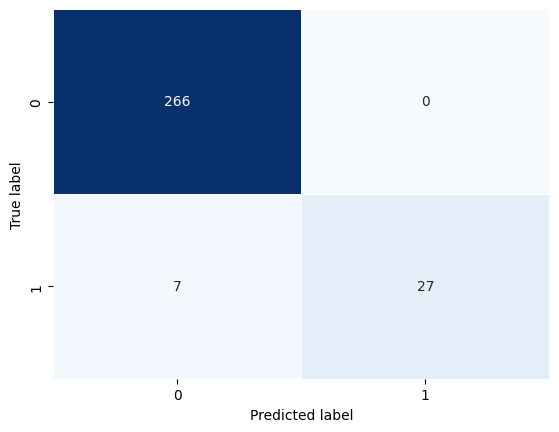

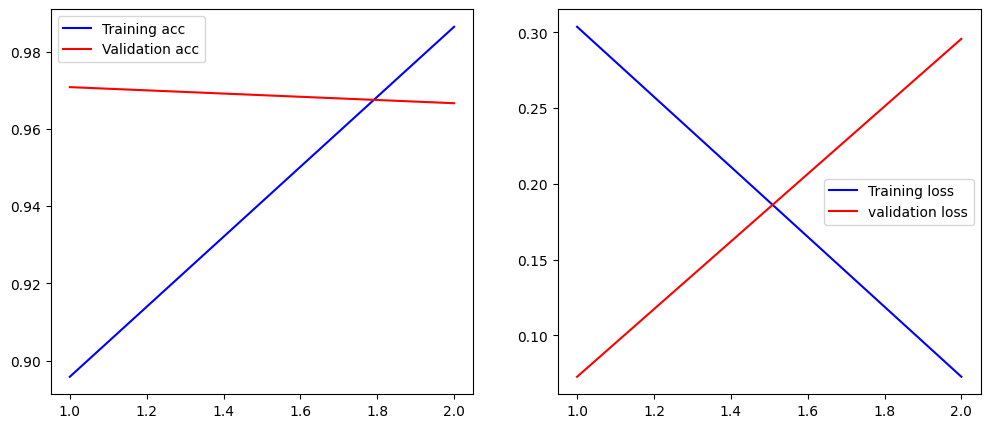

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(x[test])
y_test = np.array(y[test])
eval_ = model3.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')


preds = (model3.predict(x[test]) > 0.5).astype("int32")
c_report(y[test], preds)


import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y[test], preds)

import matplotlib.pyplot as plt
from keras.callbacks import History

def plot_model(result):
    acc = results3.history['accuracy']
    val_acc = results3.history['val_accuracy']
    loss = results3.history['loss']
    val_loss = results3.history['val_loss']
    x = range(1, len(acc)+1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label= 'Validation acc')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='validation loss')
    plt.legend()

plot_model(results3)

In [ ]:
import re

def detect_url(texte):
  """
  Fonction pour détecter une adresse URL dans un texte.

  Args:
    texte: Le texte à analyser.

  Returns:
    Une liste contenant toutes les adresses URL trouvées dans le texte.
  """

  # Expression régulière pour détecter une URL
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,6}(?:[/?].*)?)\b)"

  # Recherche de toutes les occurrences de l'expression régulière dans le texte
  urls = re.findall(regex, texte)

  # Retourne la liste des URL
  return urls

# Exemple d'utilisation
texte = "Ceci est un exemple de texte avec une URL https://www.google.com et une autre http://www.autresite.fr."
urls = detect_url(texte)

# Affichage des résultats
print(f"URL trouvées : {urls}")

URL trouvées : ['https://', 'www.', 'google.com', 'http://', 'www.', 'autresite.fr']


In [ ]:
texte = "please where are you going to https://www.facebook.org ?"
texte = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r'adresseweb', str(texte))
texte = clean_data_fr(texte)

texte= eliminer(texte)
print(texte)

please going http www facebook org
